<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

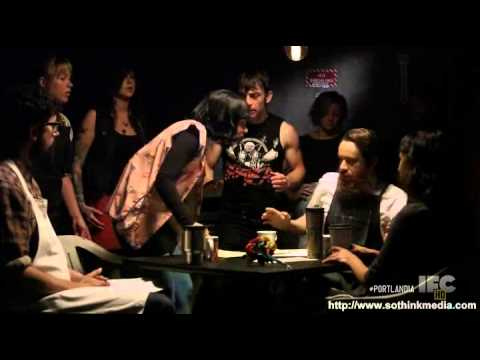

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\seanb\\1programming\\lambda\\ds-unit-4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
df['star_rating'] = df['star_rating'].map(lambda x: x.rstrip(' star rating')).astype('float')



In [6]:
df.groupby('star_rating').count()

,coffee_shop_name,full_review_text
star_rating,,
1.0,278,278
2.0,460,460
3.0,738,738
4.0,2360,2360
5.0,3780,3780


In [7]:
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [8]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [9]:
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [10]:
df['tokens']

0       [ , 11/25/2016, 1, check-in, Love, love, loved...
1       [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2       [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3       [ , 11/25/2016, Very, cool, decor!, Good, drin...
4       [ , 12/3/2016, 1, check-in, They, are, located...
                              ...                        
7611    [ , 2/19/2015, I, actually, step, into, this, ...
7612    [ , 1/21/2016, Ok,, The, Steeping, Room, IS, a...
7613    [ , 4/30/2015, Loved, coming, here, for, tea,,...
7614    [ , 8/2/2015, The, food, is, just, average., T...
7615    [ , 5/23/2015, I, finally, stopped, in, for, l...
Name: tokens, Length: 7616, dtype: object

In [14]:

from collections import Counter
word_counts = Counter()


def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [16]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

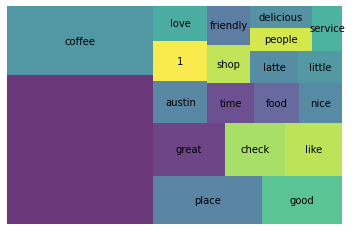

In [17]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [18]:
#reduced to 2
baddf = df[df['star_rating'] <= 2]

In [19]:
gooddf = df[df['star_rating'] > 3]

In [20]:
#Tokenize both

tokenizer = Tokenizer(nlp.vocab)
def the_tokenizer(df):
    tokens = []
    for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
        doc_tokens = [token.text for token in doc]
        tokens.append(doc_tokens)

    df['tokens'] = tokens
    


In [21]:
the_tokenizer(baddf)
the_tokenizer(gooddf)

C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [22]:
baddf

,coffee_shop_name,full_review_text,star_rating,tokens
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[ , 11/25/2016, Very, cool, decor!, Good, drin..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0,"[ , 12/2/2016, Okay,, so, after, visiting, my,..."
39,The Factory - Cafe With a Soul,12/2/2016 A cafe that doesn't have Wifi but m...,1.0,"[ , 12/2/2016, A, cafe, that, doesn't, have, W..."
40,The Factory - Cafe With a Soul,"11/14/2016 Honestly, this place is having an ...",2.0,"[ , 11/14/2016, Honestly,, this, place, is, ha..."
58,The Factory - Cafe With a Soul,11/20/2016 This is a tough one for me. I too...,2.0,"[ , 11/20/2016, This, is, a, tough, one, for, ..."
...,...,...,...,...
7554,The Steeping Room,8/31/2015 Updated review I have to downgrade ...,1.0,"[ , 8/31/2015, Updated, review, I, have, to, d..."
7561,The Steeping Room,1/16/2016 Red haired woman who greeted us was...,1.0,"[ , 1/16/2016, Red, haired, woman, who, greete..."
7574,The Steeping Room,5/8/2015 Can't vouch for the tea but the food...,2.0,"[ , 5/8/2015, Can't, vouch, for, the, tea, but..."
7583,The Steeping Room,9/13/2015 It's a lovely little tea and pastry...,2.0,"[ , 9/13/2015, It's, a, lovely, little, tea, a..."


In [23]:
# Stop word both

""" Update those tokens w/o stopwords"""
def stopwordomatic(df):
    tokens = []
    for doc in nlp.pipe(df['full_review_text'], batch_size=500):

        doc_tokens = []

        for token in doc:
            if (token.is_stop == False) & (token.is_punct == False):
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    df['tokens'] = tokens


In [24]:
stopwordomatic(gooddf)
stopwordomatic(baddf)

C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [25]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [26]:
def lemomatic(df):
    df['lemmas'] = df['full_review_text'].apply(get_lemmas)
    

In [27]:
lemomatic(baddf)
lemomatic(gooddf)

C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


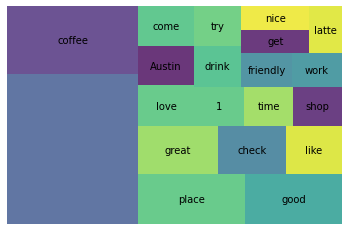

In [28]:
wc = count(gooddf['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

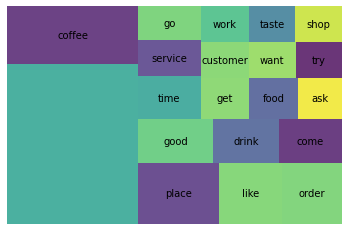

In [29]:
wc = count(baddf['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

